Missing values in IMDb dataset:
review       0
sentiment    0
dtype: int64


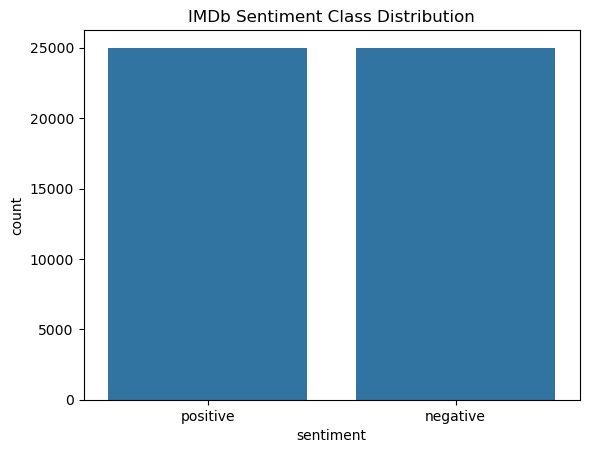

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajayb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ajayb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\ajayb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Model: LogisticRegression
Accuracy: 0.8887
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



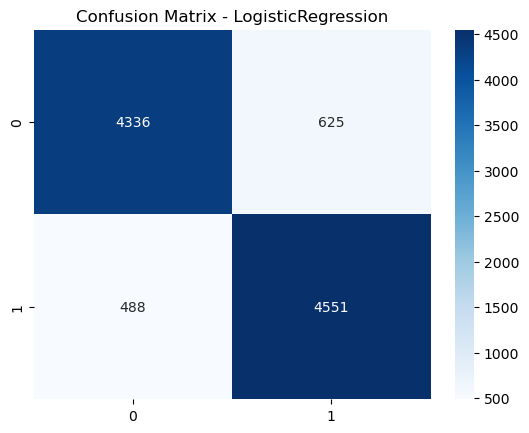


Model: MultinomialNB
Accuracy: 0.8547
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4961
           1       0.85      0.86      0.86      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



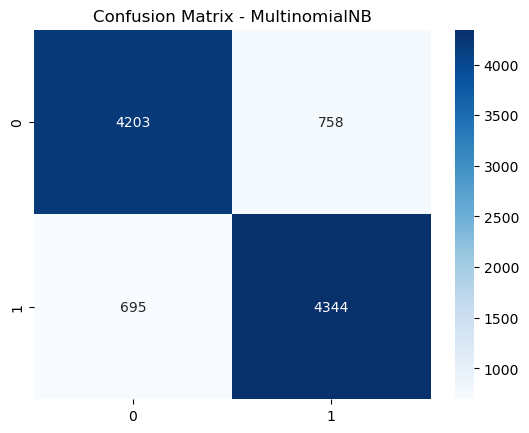


Model: SVC
Accuracy: 0.8867
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



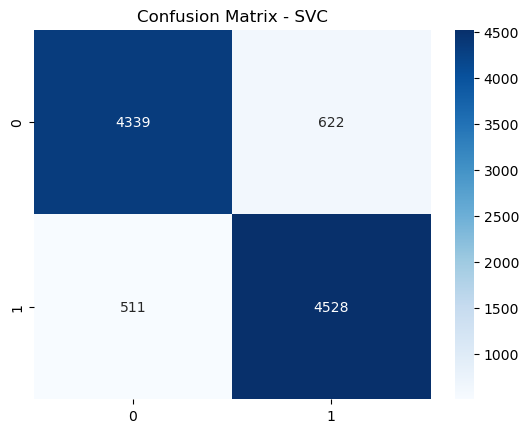


Model: RandomForestClassifier
Accuracy: 0.8538
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85      4961
           1       0.86      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



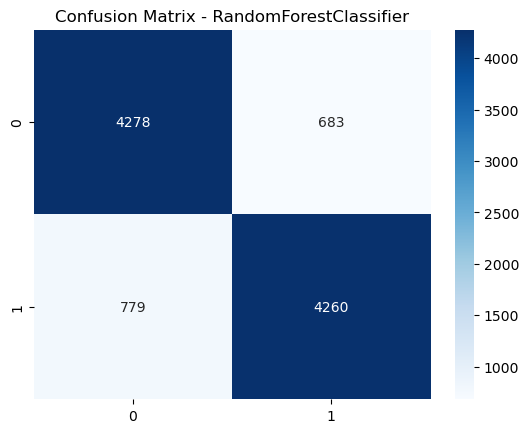

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load IMDb dataset
imdb_df = pd.read_csv("C:/Users/ajayb/Downloads/Imdb - data_imdb.csv")

# Check for missing values in IMDb dataset
print("Missing values in IMDb dataset:")
print(imdb_df.isnull().sum())

# Class distribution
sns.countplot(x='sentiment', data=imdb_df)
plt.title("IMDb Sentiment Class Distribution")
plt.show()

# Text Preprocessing
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = re.sub(r"<br\s*/?>", " ", text)  # Remove HTML tags
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Keep only letters
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

imdb_df["cleaned_review"] = imdb_df["review"].apply(preprocess_text)

# Convert sentiment labels to binary values
imdb_df["sentiment"] = imdb_df["sentiment"].map({"positive": 1, "negative": 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    imdb_df["cleaned_review"], imdb_df["sentiment"], test_size=0.2, random_state=42)

# Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model Training & Evaluation
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()

# Train multiple models
models = [
    LogisticRegression(),
    MultinomialNB(),
    SVC(kernel='linear'),
    RandomForestClassifier(n_estimators=100)
]

for model in models:
    train_and_evaluate_model(model, X_train_tfidf, y_train, X_test_tfidf, y_test)
